# Objective: Found a model to predict unemployment in Spain 

## 1 Obtaining data: Employed index in Spain
[source](https://datos.gob.es/catalogo/ea0010587-tasas-de-actividad-paro-y-empleo-por-provincia-y-sexo-trimestral-provincias-encuesta-de-poblacion-activa-epa-identificador-api-3996)

In [2]:
import matplotlib.pyplot as plt
import os 
import pandas as pd
import numpy as np

In [3]:
import geopandas as gpd

### Cleaning data

In [4]:
dirpath = os.getcwd()
employed = os.path.join(dirpath, 'data', 'employed.csv')
employed = pd.read_csv(employed, sep=',')

In [5]:
selected_years = ['Unnamed: 0']
for name in employed.columns:
    if 'T' in name and '.' not in name:
        selected_years.append(name)
    elif '.' in name:
        break

In [6]:
employed = employed[selected_years]

In [7]:
selected_years[0] = 'Location'
employed.columns = selected_years
employed = employed.set_index('Location')

In [8]:
selected_years.pop(0)
selected_years.sort()
employed = employed[selected_years]

In [9]:
employed.head()

,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,2004T1,2004T2,...,2017T3,2017T4,2018T1,2018T2,2018T3,2018T4,2019T1,2019T2,2019T3,2019T4
Location,,,,,,,,,,,,,,,,,,,,,
Total Nacional,60,16,60,44,60,44,60,29,60,31,...,61,58,35,58,74,58,72,58,74,58
02 Albacete,58,58,11,60,92,59,83,58,32,58,...,13,59,38,57,95,55,5,56,54,55
03 Alicante/Alacant,66,56,67,57,69,57,77,58,42,58,...,73,56,14,56,61,58,55,58,24,59
04 Almería,64,43,65,79,63,64,64,16,64,69,...,33,59,33,59,55,58,81,57,72,60
01 Araba/Álava,1,62,21,61,59,61,12,62,47,60,...,13,58,38,59,35,58,22,57,4,56


### Comparing Total Active People, Active Men and Active Women

In [10]:
both_sex_employed = employed[0:53]
men_employed = employed[53:53*2]
women_employed = employed[53*2:53*3]

In [11]:
both_sex_employed.head()

,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,2004T1,2004T2,...,2017T3,2017T4,2018T1,2018T2,2018T3,2018T4,2019T1,2019T2,2019T3,2019T4
Location,,,,,,,,,,,,,,,,,,,,,
Total Nacional,60,16,60,44,60,44,60,29,60,31,...,61,58,35,58,74,58,72,58,74,58
02 Albacete,58,58,11,60,92,59,83,58,32,58,...,13,59,38,57,95,55,5,56,54,55
03 Alicante/Alacant,66,56,67,57,69,57,77,58,42,58,...,73,56,14,56,61,58,55,58,24,59
04 Almería,64,43,65,79,63,64,64,16,64,69,...,33,59,33,59,55,58,81,57,72,60
01 Araba/Álava,1,62,21,61,59,61,12,62,47,60,...,13,58,38,59,35,58,22,57,4,56


In [12]:
def data_per_year(data, column, times=['T1', 'T2', 'T3', 'T4']):
    years = list(range(2002, 2020)) 
    data_per_year = []

    for index, value in data[column].items():
        if 'T1' in index:
            active_people = int(value)
        else:
            active_people += int(value)
        if 'T4' in index:
            data_per_year.append(active_people/float(len(times)))
    return pd.Series(data_per_year, index=years)

In [13]:
both_sex_employed = both_sex_employed.T
total_national = data_per_year(both_sex_employed, both_sex_employed.columns[0])

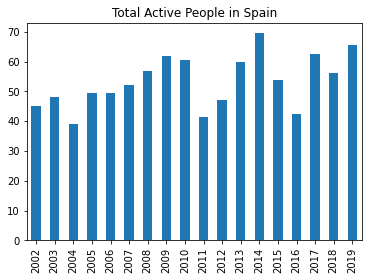

In [14]:
total_national.plot.bar(title='Total Active People in Spain')

In [15]:
men_employed = men_employed.T
active_men = data_per_year(men_employed, men_employed.columns[0])

In [16]:
women_employed = women_employed.T
active_women = data_per_year(women_employed, women_employed.columns[0])

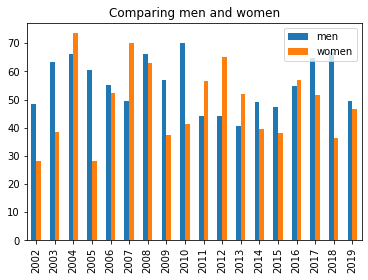

In [17]:
index = active_men.index
compare_women_men = pd.DataFrame({'men': active_men.values, 'women': active_women.values}, index=index)
compare_women_men.plot.bar(title='Comparing men and women')

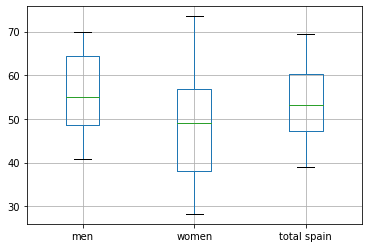

In [18]:
summary_employed = pd.DataFrame({'men': active_men.values, 'women': active_women.values,
             'total spain': total_national}, index=index)
summary_employed.boxplot()

Although in the graph it seems that some years women have been employed more than men, in this boxplot you can see how, on average, between 2002 and 2019, the number of employed men is greater than employed women.

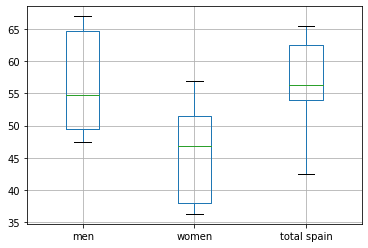

In [19]:
summary_employed.tail().boxplot()

In the last 5 years, the difference is even greater. The number of employed men is greater than that of women.

### Comparing quarters per year

In [20]:
def data_per_year_and_quarterly(data, column, time='T4'):
    years = list(range(2002, 2020)) 
    data_per_year = []
    for index, value in data[column].items():
        if time in index:
            data_per_year.append(value)
    return pd.Series(data_per_year, index=years)

In [21]:
quartely = {}
index = ['T1', 'T2', 'T3', 'T4']
for time in index:
    quartely[time] = data_per_year_and_quarterly(both_sex_employed, both_sex_employed.columns[0], time)

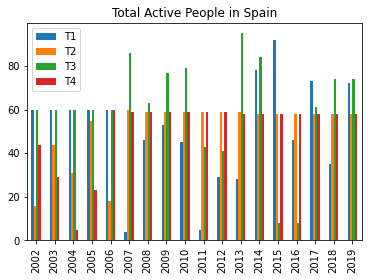

In [22]:
quartely = pd.DataFrame(quartely, columns=index)
quartely.plot.bar(title='Total Active People in Spain')

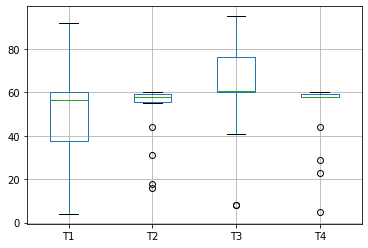

In [23]:
quartely.boxplot()

According to the results obtained, more people are employed in summer (T3) than in winter (T1). However, in both spring (T2) and autumn (T4) the average is maintained throughout the years with some year that falls outside that average (the points outside the box).

# Questions: 
## Why do these changes occur per year? What happens by provinces?

In [24]:

data = {}
for i in range(1, len(both_sex_employed.columns)):
    city = both_sex_employed.columns[i]
    values = data_per_year(both_sex_employed, city)
    data[city] = values

In [25]:
data = pd.DataFrame(data)

In [26]:
data.head()

,02 Albacete,03 Alicante/Alacant,04 Almería,01 Araba/Álava,33 Asturias,05 Ávila,06 Badajoz,07 Balears Illes,08 Barcelona,48 Bizkaia,...,42 Soria,43 Tarragona,44 Teruel,45 Toledo,46 Valencia/València,47 Valladolid,49 Zamora,50 Zaragoza,51 Ceuta,52 Melilla
2002,46.75,61.50,62.75,36.25,35.25,52.00,66.25,44.50,48.00,52.75,...,42.25,55.00,50.00,47.75,55.50,54.25,60.75,71.25,33.00,68.00
2003,73.00,65.25,51.75,48.50,48.25,45.75,48.00,47.50,66.25,37.00,...,51.75,62.00,45.00,56.50,34.25,35.75,44.50,61.50,50.25,47.75
2004,55.00,55.75,68.00,53.75,50.25,57.00,29.50,57.50,59.50,30.75,...,53.50,56.50,44.75,48.25,47.75,51.25,30.25,72.75,62.75,51.50
2005,46.25,34.25,66.00,37.75,47.50,36.25,39.50,59.25,58.75,53.25,...,47.00,56.50,65.00,57.25,53.25,50.00,39.00,49.00,53.75,67.00
2006,47.75,46.50,38.50,57.25,46.50,51.50,69.50,45.50,43.25,54.25,...,49.75,47.25,53.50,58.25,51.50,60.75,30.00,50.00,53.00,43.75


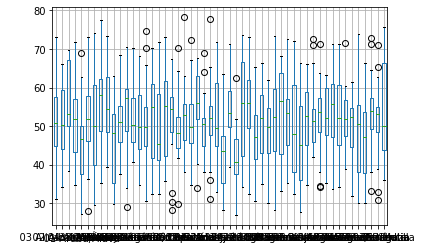

In [27]:
data.boxplot()

In [28]:
data_mean = pd.DataFrame(data.mean())

In [29]:
city_min = data_mean.idxmin().values[0]
minimum = data_mean.min()[0]
print('city=', city_min, 'with min employed=', minimum)

city=     27 Lugo with min employed= 42.041666666666664


In [67]:
data_mean = pd.DataFrame(data.tail().mean())
city_min = data_mean.idxmin().values[0]
minimum = data_mean.min()[0]
print('last 5 years: city=', city_min, 'with min employed=', minimum)

last 5 years: city=     24 León with min employed= 33.7


### Representation of the average number of employees by province
[Location of the cities of Spain](http://www.geomapik.com/desarrollo-programacion-gis/mapas-con-python-geopandas-matplotlib/)

[Oceans](https://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-ocean/)

In [5]:
cities = "data/cities_spain.geojson"
map_data = gpd.read_file(cities)
map_data.head()

,NAME_1,NAME_2,CC_2,NAT2018,geometry
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,Andalucía,Cádiz,11,8.11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,Andalucía,Córdoba,14,7.90,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,Andalucía,Granada,18,7.78,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,Andalucía,Huelva,21,7.57,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."


In [68]:
data_mean = data_mean.T

In [69]:
values = []
for city in map_data['NAME_2'].values:
    for index in data_mean.columns:
        if index.split()[1] in city:
            break
    values.append(data_mean[index].values[0])

In [70]:
map_data['EMPLOYED'] = values

In [84]:
map_data.head()

,NAME_1,NAME_2,CC_2,NAT2018,geometry,EMPLOYED,EMPLOYED2019
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",51.20,67.50
1,Andalucía,Cádiz,11,8.11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",53.55,51.50
2,Andalucía,Córdoba,14,7.90,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",51.10,56.75
3,Andalucía,Granada,18,7.78,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",52.80,45.50
4,Andalucía,Huelva,21,7.57,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",47.90,46.00


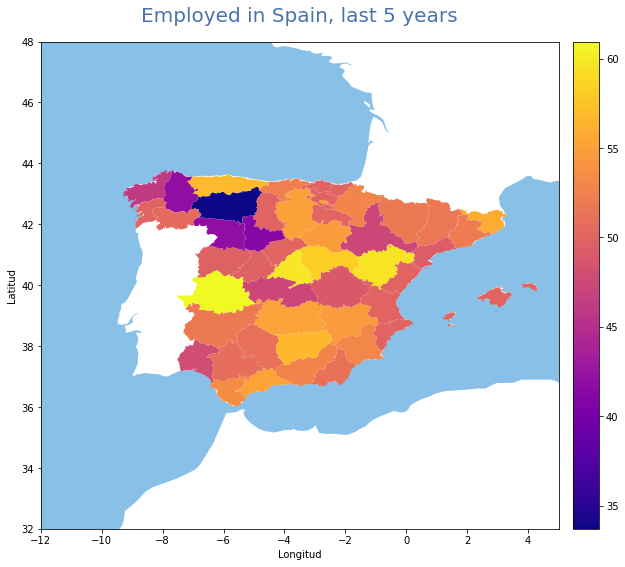

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 
ax.axis([-12, 5, 32, 48])
ax.set_title('Employed in Spain, last 5 years', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

map_data.plot(column='EMPLOYED', cmap='plasma', ax=ax, legend=True, cax=cax, zorder=5)

oceans = "data/ne_50m_ocean.shx"
map_oceans = gpd.read_file(oceans)
map_oceans.plot(ax=ax, color='#89c0e8', zorder=0)

As we have already seen, León is the city with the fewest employees in the last five years.

In [76]:
last_year = data.tail(1)

In [77]:
values = []
for city in map_data['NAME_2'].values:
    for index in last_year.columns:
        if index.split()[1] in city:
            break
    values.append(last_year[index].values[0])

In [78]:
map_data['EMPLOYED2019'] = values

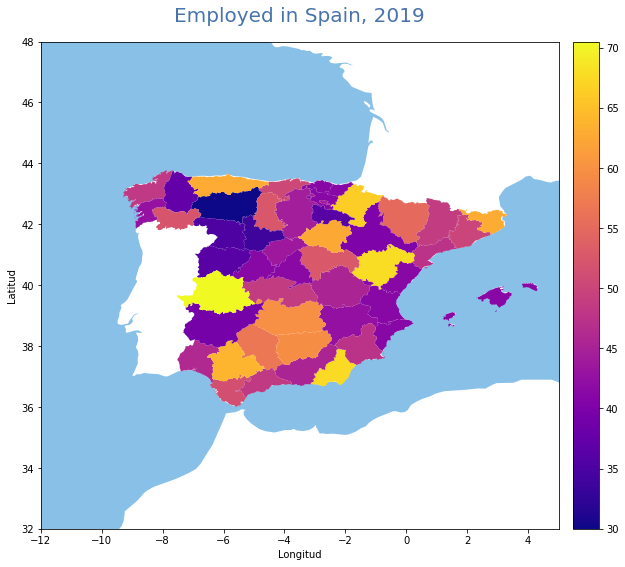

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis([-12, 5, 32, 48]) 
ax.set_title('Employed in Spain, 2019', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

map_data.plot(column='EMPLOYED2019', cmap='plasma', ax=ax, zorder=5, legend=True, cax=cax)

oceans = "data/ne_50m_ocean.shx"
map_oceans = gpd.read_file(oceans)
map_oceans.plot(ax=ax, color='#89c0e8', zorder=0)

# Population density
[Source](https://www.ine.es/jaxiT3/Datos.htm?t=2852#!tabs-tabla)

In [6]:
population = "data/population.csv"
population = pd.read_csv(population, delimiter = ';', encoding='latin1')
population['Total'] = population['Total'].apply(lambda x: int(x.replace('.', '')))
population.head()

,Provincias,Sexo,Periodo,Total
0,Total,Total,2019,47026208
1,Total,Total,2018,46722980
2,Total,Total,2017,46572132
3,Total,Total,2016,46557008
4,Total,Total,2015,46624382


In [7]:
print(population['Sexo'].unique())
total = population[population['Sexo'] == 'Total']
men_population = population[population['Sexo'] == 'Hombres']
women_population = population[population['Sexo'] == 'Mujeres']

['Total' 'Hombres' 'Mujeres']


In [8]:
men_population[men_population['Periodo'].isin([2019, 2018, 2017, 2016, 2015])]

,Provincias,Sexo,Periodo,Total
18,Total,Hombres,2019,23042428
19,Total,Hombres,2018,22896602
20,Total,Hombres,2017,22832861
21,Total,Hombres,2016,22843610
22,Total,Hombres,2015,22890383
...,...,...,...,...
2826,52 Melilla,Hombres,2019,43894
2827,52 Melilla,Hombres,2018,43765
2828,52 Melilla,Hombres,2017,43629
2829,52 Melilla,Hombres,2016,43768


In [9]:
last_year = total[total['Periodo'].isin([2019])]
last_year = last_year[last_year['Provincias'] != 'Total']
last_year = last_year.set_index('Provincias')
last_year = pd.DataFrame(last_year['Total'])
last_year = last_year.T

In [10]:
values = []
for city in map_data['NAME_2'].values:
    for index in last_year.columns:
        if index.split()[1] in city:
            break
    values.append(last_year[index].values[0])

In [11]:
map_data['POPULATION2019'] = [(x-min(values))/(max(values)-min(values)) for x in values]

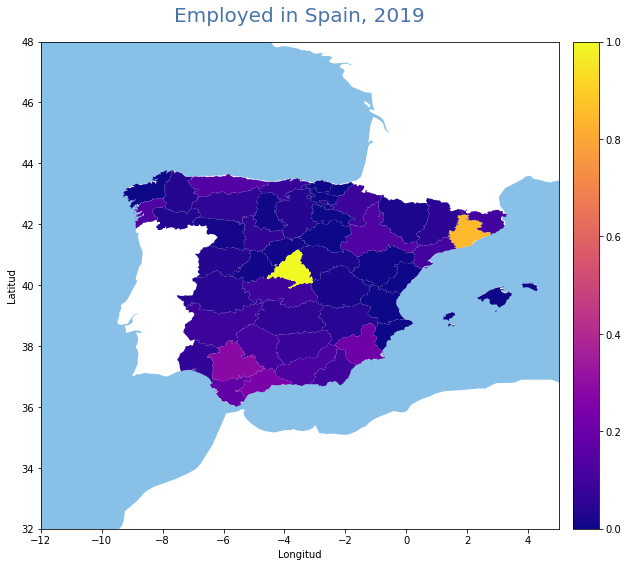

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis([-12, 5, 32, 48]) 
ax.set_title('Employed in Spain, 2019', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

map_data.plot(column='POPULATION2019', cmap='plasma', ax=ax, zorder=5, legend=True, cax=cax)

oceans = "data/ne_50m_ocean.shx"
map_oceans = gpd.read_file(oceans)
map_oceans.plot(ax=ax, color='#89c0e8', zorder=0)